In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
match_df=pd.read_csv("C://Users//91801//Desktop//MY EDA//DAY-1//IPL Dataset and Code//IPL Matches 2008-2020.csv")
ball_df=pd.read_csv("C://Users//91801//Desktop//MY EDA//DAY-1//IPL Dataset and Code//IPL Ball-by-Ball 2008-2020.csv")

In [3]:
ball_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
match_df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
ball_df.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
ball_df.shape

(193468, 18)

In [8]:
match_df.shape

(816, 17)

In [9]:
match_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
print("Total matches are played in IPL is",match_df.shape[0] )
print("\n Mathces are played in ground as below:\n",match_df.city.unique())
print("\n teams that are participated in IPL:",match_df.team1.unique())

Total matches are played in IPL is 816

 Mathces are played in ground as below:
 ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 teams that are participated in IPL: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [11]:
import warnings
warnings.filterwarnings('ignore')
match_df["season"]=pd.DatetimeIndex(match_df["date"]).year

In [12]:
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [13]:
match_per_season= match_df.groupby(['season'])[['id']].count().reset_index().rename(columns={"id":"matches"})

In [14]:
match_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'Matches Per Season')

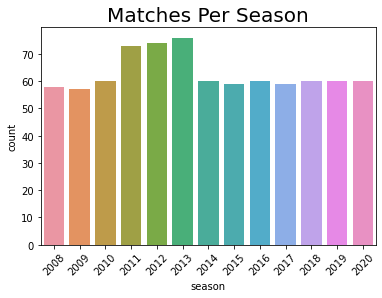

In [15]:
sns.countplot(match_df['season'])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.title("Matches Per Season",fontsize=20)

In [16]:
season_data=match_df[['season',"id"]].merge(ball_df,left_on="id",right_on='id',how="left").drop("id",axis=1)
season_data

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [17]:
season=season_data.groupby('season').total_runs.sum().reset_index()

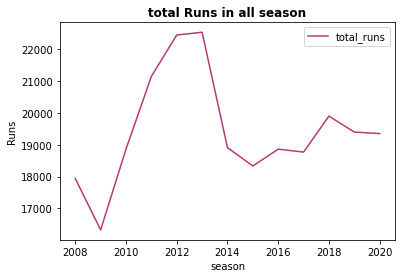

In [18]:
p=season.set_index('season')
sns.lineplot(data=p,palette='magma')
plt.ylabel("Runs")
plt.title("total Runs in all season",fontweight='bold');

In [19]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)

In [20]:
runs_per_season['Runs score per matches']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('season',inplace=True)
runs_per_season

,matches,total_runs,Runs score per matches
season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


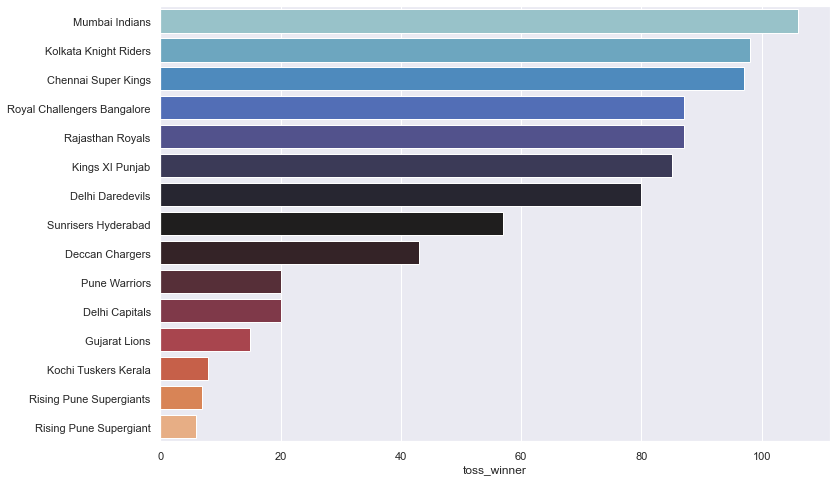

In [28]:
toss_match=match_df["toss_winner"].value_counts()
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='darkgrid')
sns.barplot(y=toss_match.index,x=toss_match,palette="icefire",orient='h');



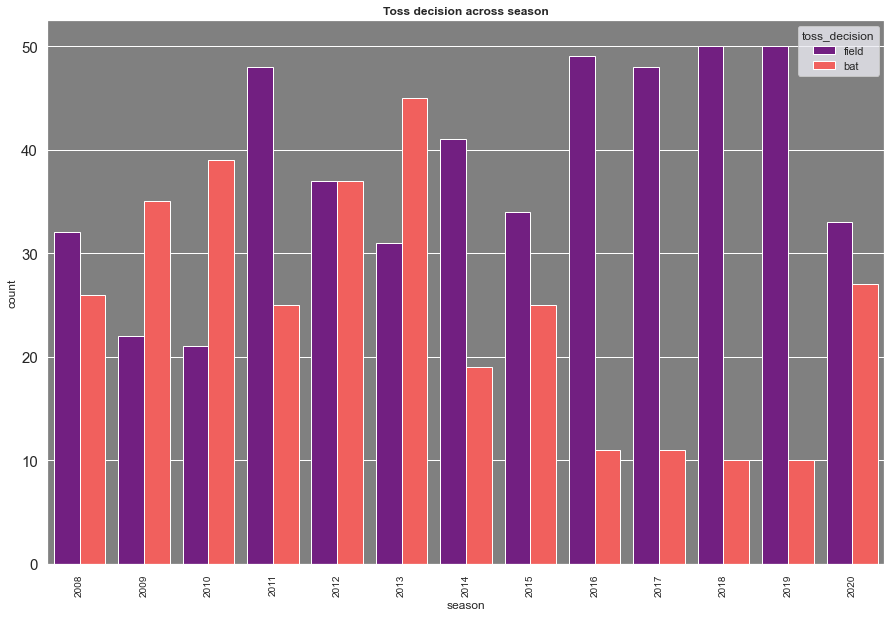

In [26]:
ax=plt.axes()
ax.set(facecolor="grey")
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x="season",hue='toss_decision',data=match_df,palette='magma',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.title("Toss decision across season",fontweight='bold');


In [33]:
a=match_df['result'].value_counts()
a

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [35]:
match_df['venue'][match_df.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [36]:
match_df['venue'][match_df.result!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [42]:
match_df.venue[match_df.toss_winner=='Mumbai Indians'][match_df.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

In [46]:
match_df.winner[match_df.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [48]:
match_df.winner[match_df.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

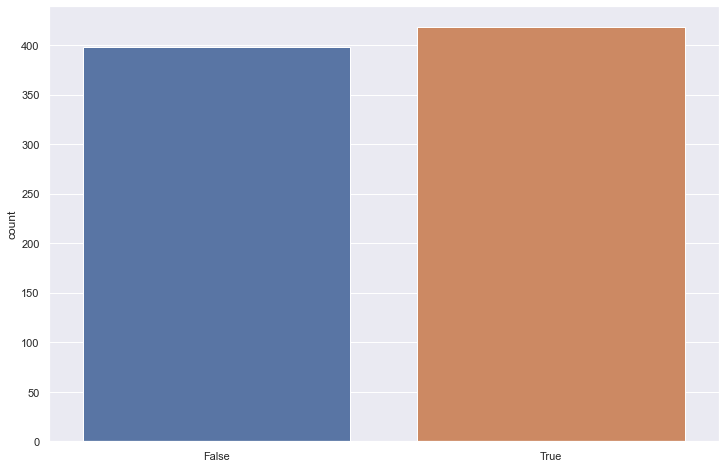

In [53]:
toss=match_df['toss_winner']==match_df['winner']
sns.countplot(toss);


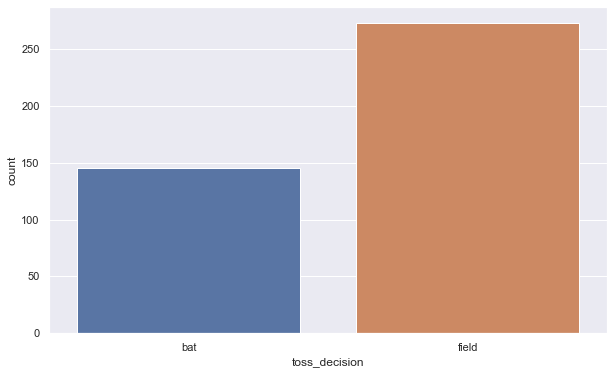

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(match_df.toss_decision[match_df['toss_winner']==match_df['winner']]);

In [61]:
player_raina= ball_df[ball_df['batsman']=='SK Raina']
player_raina

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178795,1181768,2,7,5,SK Raina,SR Watson,RD Chahar,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178796,1181768,2,7,6,SK Raina,SR Watson,RD Chahar,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178797,1181768,2,8,1,SK Raina,SR Watson,MJ McClenaghan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178886,1181768,2,9,1,SK Raina,SR Watson,RD Chahar,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians


<AxesSubplot:ylabel='dismissal_kind'>

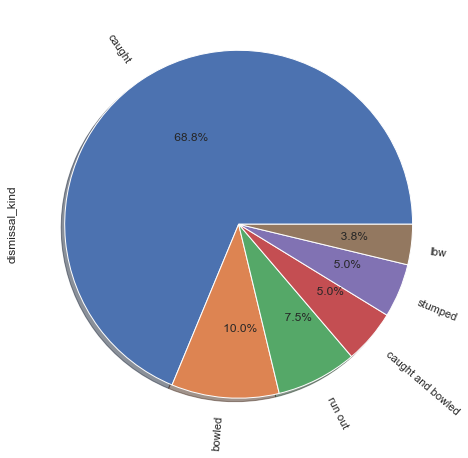

In [75]:
player_raina.dismissal_kind.value_counts().plot.pie(autopct='%10.1f%%',shadow=True,rotatelabels=True)

In [79]:
def count(player_raina,runs):
    return len(player_raina[player_raina['batsman_runs']==runs])*runs

In [95]:
print("run scored from 1's",count(player_raina,1))
print("run scored from 2's",count(player_raina,2))
print("run scored from 3's",count(player_raina,3))
print("run scored from 4's",count(player_raina,4))
print("run scored from 5's",count(player_raina,5))
print("run scored from 6's",count(player_raina,6))
print("run scored from 7's",count(player_raina,7))


run scored from 1's 1666
run scored from 2's 528
run scored from 3's 33
run scored from 4's 1972
run scored from 5's 5
run scored from 6's 1164
run scored from 7's 0


In [93]:
player_raina[player_raina['batsman_runs']==1].shape[0]

1666

In [99]:
match_df[match_df['result_margin']==match_df['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [135]:
runs=ball_df.groupby('batsman')['batsman_runs'].sum().reset_index()

y=runs.sort_values(by="batsman_runs",ascending=False).head(10).reset_index().drop('index',axis=1)

y

,batsman,batsman_runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


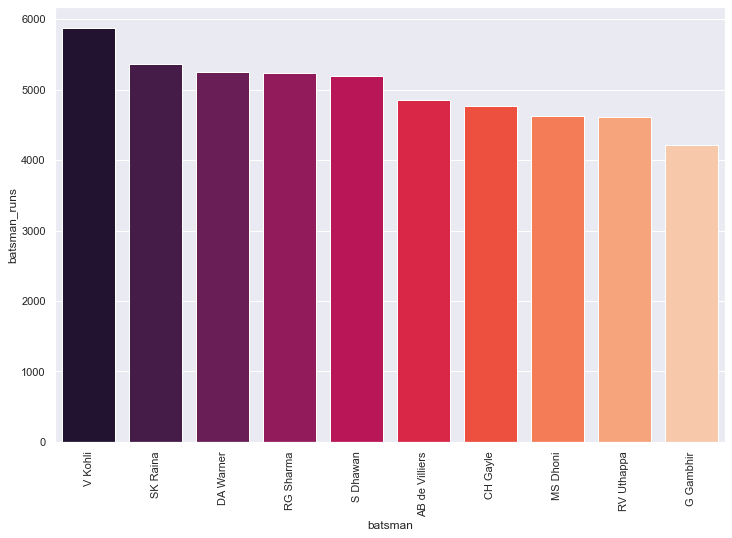

In [140]:
sns.barplot(x=y['batsman'],y=y['batsman_runs'],palette='rocket',saturation=1)
plt.xticks(rotation=90);
